# ===============================================================
# 📘 "Oltre il prompt: guida pratica all’intelligenza artificiale
#     per studenti e programmatori"
# © 2025 Francesco Di Gruttola
#
# Licensed under the Creative Commons
# Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
# 👉 https://creativecommons.org/licenses/by-nc-nd/4.0/
#
# Repository: https://github.com/CereBEST/Workshop-AI-Modena-2025.git
# ===============================================================

# Lezione 7 - Computer Vision e NLP

## 1. Reti Convolutive (CNN) con esempio MNIST

Le **Convolutional Neural Networks (CNN)** sono un tipo di rete neurale progettata per lavorare con immagini e altri dati con struttura spaziale.  
Sono alla base di quasi tutte le moderne tecniche di Computer Vision.

### 1. Perché servono le CNN?

Prendiamo un'immagine MNIST 28×28 pixel.  
Se la "flatteniamo", diventa un vettore di **784 valori**.

In una rete Dense:
- ogni neurone sarebbe collegato a tutti i 784 pixel  
- i pesi crescono molto rapidamente  
- il modello diventa enorme e difficile da addestrare  

E con immagini più grandi (es. 100×100×3 RGB) diventa impossibile.

Le immagini hanno **struttura**, non sono solo liste di numeri:
- pixel vicini sono spesso collegati
- molte forme si ripetono (bordi, curve, angoli)
- gli oggetti possono essere ovunque nell’immagine

Le CNN sfruttano proprio questo.

### 2. Local receptive field (campo recettivo locale)

In una CNN ogni neurone guarda **solo una piccola regione** dell’immagine, ad esempio 3×3 o 5×5 pixel.

Questo rispecchia il modo in cui vediamo noi:
- prima riconosciamo pattern semplici (bordi)
- poi pezzi di forma
- poi oggetti completi

### 3. Cos’è una convoluzione?

Una **convoluzione** è un’operazione che combina:
- un **filtro (kernel)**, es. 3×3
- una porzione dell’immagine della stessa dimensione

Ecco un esempio di filtro:
- [-1, 0, +1][-1, 0, +1][-1, 0, +1]

Questo filtro viene “fatto scorrere” su tutta l’immagine.

Per ogni posizione:
1. si moltiplicano pixel immagine × valori del filtro  
2. si sommano i risultati  
3. si ottiene un numero → un pixel della **feature map**

### 4. Weight sharing (condivisione dei pesi)

Il concetto più potente delle CNN:
- lo **stesso filtro** viene applicato su tutta l’immagine
- non serve un filtro diverso per ogni posizione

Questo riduce i parametri in modo enorme.

Esempio:
- Dense con 784 input e 128 neuroni → 784×128 = 100.352 pesi  
- Conv2D con 32 filtri 3×3 → 32×(3×3×1) = **288 pesi**

Da 100.000 pesi a 288!

Senza perdere capacità: il filtro riconosce il pattern ovunque appaia.

### 5. Feature map: cosa sono?

Ogni filtro produce un'immagine trasformata detta **feature map**.

Esempi di ciò che i filtri possono imparare:
- bordi verticali
- bordi orizzontali
- angoli
- linee curve
- texture

Le feature map rappresentano **cosa la rete ha trovato interessante** nell’immagine.

### 6. Stride

Lo **stride** controlla di quanto si sposta il filtro.

- `stride = 1` → si sposta di 1 pixel alla volta  
- `stride = 2` → salta pixel → output più piccolo

Output più piccolo = meno calcoli = rete più veloce.

### 7. Padding (same vs valid)

Quando un filtro 3×3 scorre su un’immagine 28×28:

- senza padding → risultato 26×26  
- perdiamo informazioni ai bordi

Il **padding** aggiunge una cornice artificiale (di solito 0).

- `padding="same"` → output stessa dimensione dell’input  
- `padding="valid"` → nessun padding, output più piccolo

### 8. Pooling

Il **Pooling** riduce la dimensione delle feature map.

Il più comune è il **MaxPooling 2×2**:

- [2, 1][7, 3] -> 7

Per ogni blocco 2×2, prende il valore massimo.

Effetti importanti:
- riduce dimensioni
- riduce numero di parametri
- rende la rete più robusta a piccole traslazioni

### 9. Come una CNN costruisce la comprensione dell’immagine

Le CNN imparano rappresentazioni **gerarchiche**:

Primo layer → pattern semplici
- bordi
- gradienti
- linee

Secondo layer → pattern intermedi
- curve
- angoli complessi
- pezzi di forme

Terzo layer → concetti astratti
- silhouette
- forme significative
- parti dell’oggetto

Ogni layer costruisce sopra il precedente.

### 10. Come impara una CNN?

Il processo è lo stesso delle reti classiche:
1. predizione
2. calcolo dell’errore
3. backpropagation
4. aggiornamento dei pesi

La differenza è che il modello aggiorna:
- i pesi dei filtri
- non connessioni neurone-per-neurone  

I filtri imparano automaticamente cosa estrarre dalle immagini.

### 11. Perché le CNN funzionano così bene?

- sfruttano le proprietà locali delle immagini  
- usano pochi pesi grazie al weight sharing  
- costruiscono gerarchie di feature  
- sono robuste a traslazioni, rotazioni leggere, rumore  
- imparano pattern ricorrenti ovunque appaiano  

Sono molto più adatte delle dense per immagini.

### 12. Struttura tipica di una CNN

Input -> Convoluzione -> ReLU -> Convoluzione -> ReLU -> MaxPooling -> Flatten -> Dense -> Output

Questa struttura è alla base di modelli come:
- LeNet
- AlexNet
- VGG
- ResNet (con skip connections)

### 13. Ruolo della ReLU

ReLU = **Rectified Linear Unit**

ReLU(X) = max(0, X)

Perché è importante:
- evita problemi di saturazione (come sigmoid/tanh)
- permette gradienti più stabili
- è veloce da calcolare
- aiuta a costruire rappresentazioni sparse ed efficienti

### 14. CNN per MNIST (concettualmente)

La CNN che useremo ha:

- **Conv2D(32, 3×3)** → riconosce bordi  
- **Conv2D(64, 3×3)** → combina i bordi in forme  
- **MaxPooling(2×2)** → riduce dimensione  
- **Flatten**  
- **Dense(128, ReLU)**  
- **Dense(10, softmax)** → classifica la cifra

Raggiunge facilmente >99% di accuratezza.

### Riepilogo

Le **Convolutional Neural Networks (CNN)** sono progettate per lavorare con dati con struttura spaziale (immagini).

Concept chiave:

1. **Local receptive field**: ogni neurone convolutivo vede solo una piccola finestra dell'immagine.
2. **Convoluzione**: un filtro (kernel) scorre sull'immagine ed estrae bordi, texture, pattern.
3. **Weight sharing**: lo stesso filtro viene applicato in tutte le posizioni → pochi parametri, invarianti a traslazioni.
4. **Pooling (es. MaxPooling)**: riduce la risoluzione spaziale, aumenta la robustezza a piccoli spostamenti.
- Le CNN guardano **piccoli pezzi** dell’immagine alla volta
- Usano **filtri** che imparano automaticamente cosa estrarre
- Lo stesso filtro viene usato ovunque (weight sharing)
- Costruiscono una **gerarchia**:
  - bordi → forme → oggetti
- Sono molto più efficienti delle reti Dense sulle immagini
- Sono lo strumento principale del Deep Learning per la visione artificiale
Architettura tipica:

- Conv2D + ReLU
- Conv2D + ReLU
- MaxPooling2D
- Flatten
- Dense finale con softmax (per classificazione)


### 1.1 Preparazione dei dati per la CNN (MNIST)


In [ ]:
# Setup

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow:", tf.__version__)

TensorFlow: 2.19.0


In [ ]:

# Ricarichiamo MNIST (nel formato originale) e prepariamo per CNN
(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = keras.datasets.mnist.load_data()

x_train_cnn = x_train_cnn.astype("float32") / 255.0
x_test_cnn = x_test_cnn.astype("float32") / 255.0

# Aggiungiamo il canale (grayscale)
x_train_cnn = x_train_cnn[..., tf.newaxis]  # shape: (N, 28, 28, 1)
x_test_cnn = x_test_cnn[..., tf.newaxis]

print("Shape training set CNN:", x_train_cnn.shape)
print("Shape test set CNN:", x_test_cnn.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape training set CNN: (60000, 28, 28, 1)
Shape test set CNN: (10000, 28, 28, 1)


### 1.2 Definizione della CNN


In [ ]:

inputs_cnn = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs_cnn)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs_cnn = layers.Dense(10, activation="softmax")(x)

model_cnn = keras.Model(inputs_cnn, outputs_cnn)

model_cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

### 1.3 Addestramento della CNN


In [ ]:

history_cnn = model_cnn.fit(
    x_train_cnn, y_train_cnn,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 131s 153ms/step - accuracy: 0.8657 - loss: 0.4234 - val_accuracy: 0.9850 - val_loss: 0.0575
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 130s 154ms/step - accuracy: 0.9738 - loss: 0.0905 - val_accuracy: 0.9887 - val_loss: 0.0429
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 126s 149ms/step - accuracy: 0.9808 - loss: 0.0648 - val_accuracy: 0.9902 - val_loss: 0.0368
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 141s 148ms/step - accuracy: 0.9840 - loss: 0.0510 - val_accuracy: 0.9908 - val_loss: 0.0328
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 144s 150ms/step - accuracy: 0.9860 - loss: 0.0443 - val_accuracy: 0.9913 - val_loss: 0.0315


### 1.4 Valutazione della CNN


In [ ]:

test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test_cnn, y_test_cnn)
print("Test accuracy (CNN su MNIST):", test_acc_cnn)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9891 - loss: 0.0354
Test accuracy (CNN su MNIST): 0.9915000200271606


### 1.5 Visualizzare i filtri del primo layer convolutivo


Shape filtri: (3, 3, 1, 32)


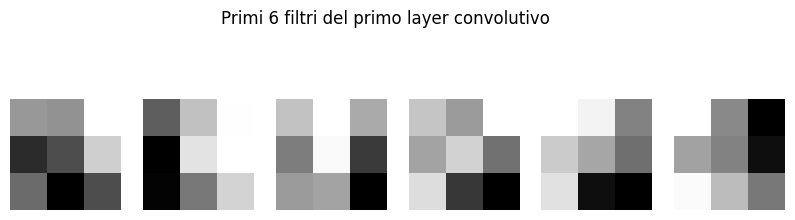

In [ ]:
import matplotlib.pyplot as plt

first_conv_layer = model_cnn.layers[1]
filters, biases = first_conv_layer.get_weights()

print("Shape filtri:", filters.shape)  # (3,3,1,32)

f_min, f_max = filters.min(), filters.max()
filters_norm = (filters - f_min) / (f_max - f_min + 1e-7)

n_filters = 6
plt.figure(figsize=(10, 3))

for i in range(n_filters):
    f = filters_norm[:, :, 0, i]
    plt.subplot(1, n_filters, i + 1)
    plt.imshow(f, cmap='gray')
    plt.axis('off')

plt.suptitle("Primi 6 filtri del primo layer convolutivo")
plt.show()


### 1.6 Visualizzare alcune feature map


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
(1, 28, 28, 1)
0


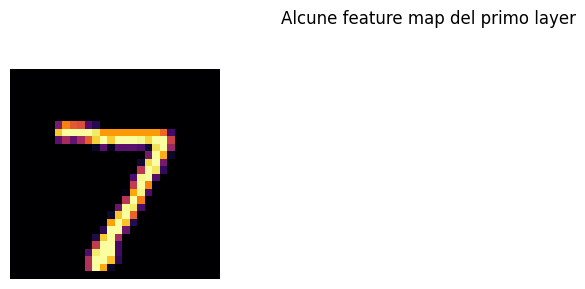

In [ ]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model_cnn.layers[:4]]
activation_model = models.Model(inputs=model_cnn.input, outputs=layer_outputs)

img = x_test_cnn[0:1]
activations = activation_model.predict(img)

layer_names = [layer.name for layer in model_cnn.layers[:4]]

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.figure(figsize=(12, 6))
for i in range(1):
    print(i)
    plt.subplot(2, 3, i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='inferno')
    plt.axis('off')

plt.suptitle("Alcune feature map del primo layer")
plt.show()

## 2. Natural Language Processing (NLP)

### 1. Introduzione a NLP (Natural Language Processing)

L'**NLP** si occupa di far "capire" il linguaggio naturale alle macchine.

Esempi di problemi NLP:
- classificazione di testo (spam / non spam, sentiment, topic)
- traduzione automatica
- riassunto automatico
- riconoscimento di entità (nomi, luoghi, ecc.)
- chatbot, Q&A, ecc.

#### 1.1 Il problema principale: il testo non è numerico

Le reti neurali lavorano con **numeri**, non con parole.
Quindi il primo passo è sempre: **convertire il testo in numeri**.

Passi tipici:
1. **Pulizia** del testo (minuscole, rimozione punteggiatura, ecc.)
2. **Tokenizzazione** → trasformare la frase in una sequenza di "token" (parole o sottoparole)
3. Creare un **vocabolario** (lista di token ammessi)
4. Mappare ogni token a un **intero** (id)
5. Ottenere così una **sequenza di interi** per ogni frase.

Esempio:
- frase: `"mi piace molto il deep learning"`
- token: [`"mi"`, `"piace"`, `"molto"`, `"il"`, `"deep"`, `"learning"`]
- id: `[12, 47, 85, 5, 102, 333]` (numeri inventati)

#### 1.2 Perché non basta one-hot?

Una rappresentazione semplice è il **one-hot encoding**:
- ogni parola è un vettore con tutti 0 tranne un 1 in una posizione

Problemi:
- vettori enormi (uno per ogni parola del vocabolario)
- nessuna informazione di somiglianza (per il modello "gatto" e "cane" sono completamente diversi)

#### 1.3 Word Embedding

Un **embedding** è una rappresentazione vettoriale densa per i token:
- ogni parola viene mappata a un vettore di dimensione fissa (es. 16, 64, 128)
- parole simili tendono ad avere vettori simili

In Keras esiste un layer apposito:
- `Embedding(input_dim=vocab_size, output_dim=embedding_dim)`

Questo layer impara **durante il training** quali vettori associare alle parole.

#### 1.4 Sequenze e padding

Nei modelli di deep learning ci serve che i batch abbiano shape coerenti.

Le frasi hanno lunghezze diverse:
- "ciao" → 1 parola
- "oggi è una bellissima giornata" → 4 parole
- ecc.

Allora:
- scegliamo una lunghezza massima `maxlen`
- tagliamo le frasi troppo lunghe
- **padding** con zeri quelle più corte

Esempio (`maxlen = 5`):

- `[12, 47]` → `[0, 0, 12, 47, 0]`  
- `[5, 7, 9, 11, 13, 25]` → `[7, 9, 11, 13, 25]` (taglio)

In pratica useremo:
- un livello di **tokenizzazione** (`TextVectorization`)
- un **Embedding**
- e poi un modello (Dense, RNN, Transformer, ecc.) sopra.

Useremo un mini dataset finto (frasi positive/negative) per mostrare:

- TextVectorization
- Embedding
- GlobalAveragePooling1D per ottenere un vettore di frase

In [ ]:
# Setup

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow:", tf.__version__)

TensorFlow: 2.19.0


In [ ]:
from tensorflow.keras.layers import TextVectorization

# Mini dataset di esempio
testi = np.array([
    "mi piace molto questo film",
    "questo film è stato noioso",
    "adoro questo prodotto",
    "odio profondamente questo prodotto",
    "esperienza fantastica, sono molto soddisfatto",
    "pessima esperienza, non lo comprerò mai più"
])

etichette = np.array([1, 0, 1, 0, 1, 0])  # 1 = positivo, 0 = negativo

# Parametri
vocab_size = 1000  # massimo numero di token da considerare
maxlen = 10  # lunghezza massima delle frasi che il modello usa

# Layer di vettorizzazione del testo
vectorizer = TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=maxlen
)

# Adattiamo il vocabolario ai nostri testi
vectorizer.adapt(testi)

# Vediamo il vocabolario
vocab = vectorizer.get_vocabulary()
print("Dimensione vocabolario:", len(vocab))
print("Prime 10 parole:", vocab[:10])

# Applichiamo la trasformazione
X = vectorizer(testi)
print("Shape X:", X.shape)
print("Esempio di sequenza:", X[0])

Dimensione vocabolario: 24
Prime 10 parole: ['', '[UNK]', np.str_('questo'), np.str_('prodotto'), np.str_('molto'), np.str_('film'), np.str_('esperienza'), np.str_('è'), np.str_('stato'), np.str_('sono')]
Shape X: (6, 10)
Esempio di sequenza: tf.Tensor([18 13  4  2  5  0  0  0  0  0], shape=(10,), dtype=int64)


In [ ]:
# Modello di classificazione semplice: Embedding + media + Dense

embedding_dim = 16  # dimensione del vettore di ogni parola

inputs = keras.Input(shape=(maxlen,))
x = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)
x = layers.GlobalAveragePooling1D()(x)  # media sui token
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_nlp = keras.Model(inputs, outputs)

model_nlp.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_nlp.summary()

history_nlp = model_nlp.fit(
    X, etichette,
    epochs=30,
    batch_size=2,
    verbose=0
)

loss, acc = model_nlp.evaluate(X, etichette, verbose=0)
print("Accuratezza sul mini dataset:", acc)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 10, 16)         │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,289 (63.63 KB)

 Trainable params: 16,289 (63.63 KB)

 Non-trainable params: 0 (0.00 B)

Accuratezza sul mini dataset: 0.6666666865348816


## 3. Recurrent Neural Network (RNN)

Finora abbiamo trattato le frasi come **sacchetti di parole** (bag of words) o liste di token su cui calcolare una media.

Ma spesso l'**ordine** delle parole è fondamentale:
- "non è buono" ≠ "è buono"
- "io mangio il cane" ≠ "il cane mi mangia"

Serve un modello che legga la sequenza **passo dopo passo**, mantenendo una memoria del passato: le **RNN** (Recurrent Neural Networks).

### 2.1 RNN semplici

Una RNN elabora una sequenza `x₁, x₂, ..., x_T` e produce stati nascosti `h₁, h₂, ..., h_T`.

A ogni passo:
- prende in input il token corrente `x_t`
- aggiorna uno stato interno `h_t` usando `h_{t-1}`

In pseudocodice:

`h_t = f(Wx * x_t + Wh * h_{t-1} + b)`

Problema: **vanishing gradient**
- quando la sequenza è lunga, il gradiente tende a svanire
- la rete "dimentica" il contesto lontano

### 2.2 LSTM: Long Short-Term Memory

Le **LSTM** sono un tipo speciale di RNN progettate per:
- imparare **dipendenze a lungo termine**
- evitare il problema del vanishing gradient

Dentro una LSTM ci sono:
- uno **stato della cella** (memoria a lungo termine)
- uno **stato nascosto** (output al tempo t)
- tre "porte" (gate):
  - **forget gate**: cosa dimentico?
  - **input gate**: cosa aggiungo alla memoria?
  - **output gate**: cosa rendo visibile in uscita?

Non serve entrare nei dettagli matematici, ma è importante l'idea: la LSTM decide cosa ricordare e cosa dimenticare della sequenza.

### 2.3 GRU: Gated Recurrent Unit

Le **GRU** sono una variante più semplice delle LSTM:
- meno parametri
- concettualmente simili (anche loro usano dei gate)
- spesso prestazioni simili alle LSTM

In pratica:
- se non hai vincoli particolari, **LSTM e GRU sono entrambe valide scelte**

### 2.4 Uso tipico per testo

Pipeline classica per classificazione di testo con RNN:

1. testo → token → sequenze di interi
2. `Embedding` per trasformare gli interi in vettori
3. `LSTM` o `GRU` per leggere la sequenza
4. Dense finale + attivazione (`sigmoid` per binaria, `softmax` per multi-classe)

#### Esempio: sentiment analysis su recensioni di film (IMDB) con LSTM


In [ ]:
# Carichiamo il dataset IMDB
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print("Esempio di recensione (id):", x_train[0][:20], "...")
print("Etichetta:", y_train[0])

# Padding delle sequenze per avere lunghezza fissa
x_train_pad = pad_sequences(x_train, maxlen=maxlen)
x_test_pad = pad_sequences(x_test, maxlen=maxlen)

print("Shape x_train_pad:", x_train_pad.shape)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Esempio di recensione (id): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25] ...
Etichetta: 1
Shape x_train_pad: (25000, 200)


In [ ]:
embedding_dim = 64

inputs = keras.Input(shape=(maxlen,))
x = layers.Embedding(vocab_size, embedding_dim)(inputs)
x = layers.LSTM(64)(x)  # si può mettere return_sequences=True per più LSTM di fila
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_lstm = keras.Model(inputs, outputs)

model_lstm.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_lstm.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,137 (2.58 MB)

 Trainable params: 675,137 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_lstm = model_lstm.fit(
    x_train_pad, y_train,
    epochs=3,
    batch_size=128,
    validation_split=0.2
)

test_loss_lstm, test_acc_lstm = model_lstm.evaluate(x_test_pad, y_test)
print("Accuratezza LSTM su IMDB:", test_acc_lstm)


Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 203ms/step - accuracy: 0.6456 - loss: 0.6065 - val_accuracy: 0.8626 - val_loss: 0.3194
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 206ms/step - accuracy: 0.9003 - loss: 0.2560 - val_accuracy: 0.8620 - val_loss: 0.3283
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 204ms/step - accuracy: 0.9302 - loss: 0.1870 - val_accuracy: 0.8732 - val_loss: 0.3208
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8668 - loss: 0.3389
Accuratezza LSTM su IMDB: 0.8687199950218201


In [ ]:
"""
Stessa architettura ma con GRU
"""

inputs = keras.Input(shape=(maxlen,))
x = layers.Embedding(vocab_size, embedding_dim)(inputs)
x = layers.GRU(64)(x)  # GRU al posto della LSTM
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_gru = keras.Model(inputs, outputs)

model_gru.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_gru.summary()

history_gru = model_gru.fit(
    x_train_pad, y_train,
    epochs=3,
    batch_size=128,
    validation_split=0.2
)

test_loss_gru, test_acc_gru = model_gru.evaluate(x_test_pad, y_test)
print("Accuratezza GRU su IMDB:", test_acc_gru)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,073 (2.54 MB)

 Trainable params: 667,073 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 214ms/step - accuracy: 0.6020 - loss: 0.6447 - val_accuracy: 0.8392 - val_loss: 0.3685
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 217ms/step - accuracy: 0.8824 - loss: 0.2858 - val_accuracy: 0.8432 - val_loss: 0.3548
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 214ms/step - accuracy: 0.9216 - loss: 0.2044 - val_accuracy: 0.8758 - val_loss: 0.3153
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8647 - loss: 0.3395
Accuratezza GRU su IMDB: 0.8664399981498718


## Transformers

I **Transformers** sono una famiglia di modelli introdotta nel 2017
("Attention is All You Need") e hanno rivoluzionato NLP.

Sono alla base dei moderni **Large Language Models (LLM)**.

### 3.1 Limiti delle RNN

Le RNN (LSTM/GRU) leggono la sequenza **passo dopo passo**:
- non possono parallelizzare bene il calcolo
- faticano con sequenze molto lunghe
- la distanza tra due token lontani è difficile da gestire

### 3.2 Idea chiave: Self-Attention

Il **self-attention** permette al modello di far "guardare" ogni parola a tutte le altre parole della frase

Per ogni token:
- calcola quanto deve “prestare attenzione” agli altri token
- combina le informazioni in base a questi pesi di attenzione

In pratica:
- la rappresentazione di una parola tiene conto del **contesto globale** della frase
- il calcolo è altamente **parallelizzabile**

### 3.3 Query, Key, Value (Q, K, V)

Per ogni token, il modello calcola tre vettori:
- **Query (Q)**
- **Key (K)**
- **Value (V)**

I pesi di attenzione vengono calcolati confrontando:
- le Query di un token con le Key di tutti gli altri
- poi vengono combinati i Value in base a questi pesi

### 3.4 Positional Encoding

I Transformers non hanno una struttura sequenziale interna come le RNN.
Perciò devono sapere **in che posizione** si trova ogni token.

Si aggiunge quindi un **positional encoding**:
- un vettore che codifica la posizione
- sommato all'embedding della parola

### 3.5 Vantaggi e svantaggi dei Transformers

Vantaggi:
- parallelizzabili (si elaborano tutti i token in parallelo)
- gestiscono bene dipendenze anche molto **lontane** nella frase
- scalano molto bene con dati e modello
- sono la base di BERT, GPT, T5, ecc.

Svantaggi:
- Capacità limitata dei token in input
- Serve ampia potenza computazionale per l'allenamento

### 3.6 Architettura base di un Transformer Encoder

Un blocco tipico di **encoder**:

1. **Multi-Head Self-Attention**
2. **Add & Layer Normalization**
3. **Feed-Forward Network (2 Dense)**
4. **Add & Layer Normalization**

Ripetuto più volte (stack di blocchi encoder).

### 3.7 Esempio didattico: classificazione di testo con un piccolo Transformer

Useremo:
- `TextVectorization` per tokenizzare
- `Embedding`
- un semplice **encoder Transformer** fatto con:
  - `MultiHeadAttention`
  - `LayerNormalization`
  - feed-forward Dense
- Pooling + Dense per classificazione


In [ ]:
# Classificazione di un testo con le Transformers

from tensorflow.keras.layers import TextVectorization

# Mini dataset
testi = np.array([
    "mi piace molto questo film",
    "questo film è stato noioso",
    "adoro questo prodotto",
    "odio profondamente questo prodotto",
    "esperienza fantastica sono molto soddisfatto",
    "pessima esperienza non lo comprerò mai più",
    "film bellissimo da rivedere",
    "film orrendo da dimenticare",
])

etichette = np.array([1, 0, 1, 0, 1, 0, 1, 0])

vocab_size = 2000
maxlen = 12

vectorizer = TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=maxlen
)

vectorizer.adapt(testi)
X = vectorizer(testi)

print("Shape X:", X.shape)
print("Un esempio di sequenza:", X[0])


Shape X: (8, 12)
Un esempio di sequenza: tf.Tensor([21 15  5  2  3  0  0  0  0  0  0  0], shape=(12,), dtype=int64)


In [ ]:
def transformer_encoder(inputs, num_heads, dim_ff, dropout=0.1):
    """
    Semplice encoder Transformer:
    - MultiHeadAttention (self-attention)
    - Add & LayerNorm
    - Feed-forward (Dense -> Dense)
    - Add & LayerNorm
    """

    # Self-attention
    x = layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=inputs.shape[-1],
        dropout=dropout
    )(inputs, inputs)
    x = layers.Add()([x, inputs])
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Feed-forward
    ff = layers.Dense(dim_ff, activation="relu")(x)
    ff = layers.Dense(inputs.shape[-1])(ff)
    x = layers.Add()([x, ff])
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    return x


In [ ]:
embedding_dim = 32
num_heads = 2
dim_ff = 64

inputs = keras.Input(shape=(maxlen,), dtype=tf.int32)

# Embedding + positional encoding semplice (learnable)
x = layers.Embedding(vocab_size, embedding_dim)(inputs)

# Aggiungiamo un positional embedding learnable
positions = tf.range(start=0, limit=maxlen, delta=1)
positional_embedding = layers.Embedding(input_dim=maxlen, output_dim=embedding_dim)(positions)
x = x + positional_embedding  # broadcasting sulle batch

# Applichiamo il nostro encoder Transformer
x = transformer_encoder(x, num_heads=num_heads, dim_ff=dim_ff)

# Pooling sulla dimensione temporale (media)
x = layers.GlobalAveragePooling1D()(x)

# Classificatore finale
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_transf = keras.Model(inputs, outputs)

model_transf.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_transf.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 12, 32)    │     64,000 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 12, 32)    │          0 │ embedding_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 12, 32)    │      8,416 │ add[0][0],        │
│ (MultiHeadAttentio… │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 12, 32)    │          0 │ multi_head_atten… │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 12, 32)    │         64 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 12, 64)    │      2,112 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 12, 32)    │      2,080 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 12, 32)    │          0 │ layer_normalizat… │
│                     │                   │            │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 12, 32)    │         64 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 32)        │      1,056 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         33 │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 77,825 (304.00 KB)

 Trainable params: 77,825 (304.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_transf = model_transf.fit(
    X, etichette,
    epochs=50,
    batch_size=2,
    verbose=0
)

loss_t, acc_t = model_transf.evaluate(X, etichette, verbose=0)
print("Accuratezza Transformer sul mini dataset:", acc_t)


Accuratezza Transformer sul mini dataset: 1.0


# 4. Esercitazione pratica